In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import requests
import os
import zipfile, io

# Data

### Wrangling

Use the [URL](https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip) for College Scorecard Raw Data from www.data.gov to download the file: `CollegeScorecare_Raw_Data.zip`. Unzip the data into a folder called `data`.

_Note: Preferably create the folder_`data`_in a parent directory since the extracted data is about 2.5 GB in size. Using Version Control to track such a large folder and pushing it to a repository will soon turn into a headache._ <br><br>
Here is the Python code to do the same:

In [ ]:
folder_name = r'../data'

if not os.path.exists(folder_name):
    os.makedirs(folder_name)


url = r'https://ed-public-download.app.cloud.gov/downloads/CollegeScorecard_Raw_Data.zip'
response = requests.get(url, stream = True)

with zipfile.ZipFile(io.BytesIO(response.content)) as zf:
    for elem in zf.namelist():
        zf.extract(elem, '../data')

For this analysis, we will be using the data for the **Academic Year 2017-18** as reported by all the [Integrated Postsecondary Education Data System (IPEDS)](https://nces.ed.gov/ipeds/) institutions. <br> The data resides in a csv file called: `MERGED2017_18_PP.csv`

In [2]:
df_raw = pd.read_csv('../data/CollegeScorecard_Raw_Data/MERGED2017_18_PP.csv', low_memory = False)

In [3]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7058 entries, 0 to 7057
Columns: 1977 entries, UNITID to OMENRUP_PARTTIME_POOLED_SUPP
dtypes: float64(1894), int64(14), object(69)
memory usage: 106.5+ MB


___________________________________________________________________________________________________________________________

The raw data comprises of 1977 columns. The structure of the data violates the definition of Tidy Data according to Hadely Wickham's Paper on Tidy Data which can be found [here](https://www.jstatsoft.org/article/view/v059i10). <br> Due to this reason, many columns are not variable names; instead, they are possible values. This drastically increases the number of columns in the dataset. In short, the number of variables is far fewer than the number of columns in the dataset.

For this Analysis, we will be selecting a subset of the variables. You can go through the [full documentation](https://collegescorecard.ed.gov/data/documentation/) to figure out which variables strike as most interesting to you.


Here, I have selected the following variables:

- __UNITID__: <br>Data files are provided at the UNITID level, which is the unique identification number assigned to postsecondary institutions as surveyed through IPEDS - Integrated Postsecondary Education Data System.


- __INSTNM__: <br>The institution’s name, as reported in IPEDS.


- __CITY, STABBR__: <br>As reported in IPEDS.


- __NUMBRANCH__: <br>The branch campus column identifies the number of branch campuses at that institution.


- __HIGHDEG__: <br>Highest award identifies the highest award level conferred at the institution.


- __PREDDEG__: <br>Predominant undergraduate award identifies the type of award that the institution primarily confers; for instance, an institution that awards 40 percent bachelor’s degrees, 30 percent associate degrees, and 30 percent certificate programs would be classified as predominantly bachelor’s degree awarding.


- __CONTROL__: <br>This element is reported directly to IPEDS, and identifies whether the institution’s governance structure is public, private nonprofit, or private for-profit.


- __DISTANCEONLY__: <br>Institutions are identified as distance education-only if all their programs are available only via distance education.


- __TUITFTE__: <br>The net tuition revenue per full-time equivalent (FTE) student uses tuition revenue minus discounts and allowances, and divides that by the number of FTE undergraduate and graduate students.


- __AVGFACSAL__: <br>The average faculty salary produces the average faculty salary per month, by dividing the total salary outlays by the number of months worked for all full-time, nonmedical instructional staff.


- __ADM_RATE_ALL__: <br>Colleges report to IPEDS their Fall admissions rate, defined as the number of admitted undergraduates divided by the number of undergraduates who applied. ADM_RATE_ALL represents the admissions rate across all campuses, defined as the total number of admitted undergraduates across all branches divided by the total number of undergraduates who applied across all branches.


- __SATVR25, SATVR75, SATMT25, SATMT75, ACTCM25, ACTCM75__: <br>The files include the 25th and 75th percentiles of SAT reading (SATVR* for _25 and _75), writing (SATWR* for _25 and _75), math (SATMT* for _25 and _75) NOTE: WR is has no data and should be dropped.


- __UGDS__: <br>This element includes the number of degree/certificate-seeking undergraduates enrolled in the fall, as reported in the IPEDS Fall Enrollment component.


- __UG25ABV__: <br>This element identifies the share of students enrolled as of the institutions official fall census date (or October 15 of the IPEDS collection year, whichever is earlier) who are ages 25 and over.


- __PCTFLOAN__: <br>This element, as reported in the IPEDS Student Financial Aid (SFA) component, shows the share of undergraduate students who received federal loans in a given year.


- __CDR3__: <br>Cohort default rates are produced annually as an institutional accountability metric; institutions with high default rates may lose access to federal financial aid. The three-year cohort default rate (CDR3) represents a snapshot in time.

Lets select these variables of interest from the `df_raw` and store it in `df`:

In [4]:
cols_of_interest = ['UNITID', 'INSTNM', 'CITY', 'STABBR', 'NUMBRANCH', 'HIGHDEG', 'PREDDEG', 'CONTROL', 'DISTANCEONLY', 
                    'TUITFTE', 'AVGFACSAL', 'ADM_RATE_ALL', 'SATVR25', 'SATVR75', 'SATMT25', 'SATMT75', 'ACTCM25', 
                    'ACTCM75', 'UGDS', 'UG25ABV', 'PCTFLOAN', 'CDR3']

data_of_interest = df_raw[cols_of_interest]

In [5]:
data_of_interest.shape

(7058, 22)

### Assessing and Cleaning

In [6]:
df_clean = data_of_interest.copy()

#### Turn column names to lower case:

In [7]:
df_clean.rename( columns = lambda col: col.strip().lower(), inplace = True )

#### Check for NULL entries:

In [8]:
df_clean.isnull().any()

unitid          False
instnm          False
city            False
stabbr          False
numbranch       False
highdeg         False
preddeg         False
control         False
distanceonly     True
tuitfte          True
avgfacsal        True
adm_rate_all     True
satvr25          True
satvr75          True
satmt25          True
satmt75          True
actcm25          True
actcm75          True
ugds             True
ug25abv          True
pctfloan         True
cdr3             True
dtype: bool

In [9]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7058 entries, 0 to 7057
Data columns (total 22 columns):
unitid          7058 non-null int64
instnm          7058 non-null object
city            7058 non-null object
stabbr          7058 non-null object
numbranch       7058 non-null int64
highdeg         7058 non-null int64
preddeg         7058 non-null int64
control         7058 non-null int64
distanceonly    6614 non-null float64
tuitfte         6593 non-null float64
avgfacsal       4209 non-null float64
adm_rate_all    2230 non-null float64
satvr25         1233 non-null float64
satvr75         1233 non-null float64
satmt25         1233 non-null float64
satmt75         1233 non-null float64
actcm25         1289 non-null float64
actcm75         1289 non-null float64
ugds            6312 non-null float64
ug25abv         6239 non-null float64
pctfloan        6291 non-null float64
cdr3            6055 non-null float64
dtypes: float64(14), int64(5), object(3)
memory usage: 1.2+ MB


There seem to be a lot of NULL values for the SAT and ACT data. We will have to consider this during the analysis.

#### Many Categorical variables have been encoded as Numeric, as evident from the documentation. Let's convert those back:

- **`stabbr`**:

In [10]:
df_clean.stabbr.unique()

array(['AL', 'AK', 'WA', 'AZ', 'NM', 'AR', 'CA', 'MN', 'CO', 'CT', 'NY',
       'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'MI', 'IA', 'KS',
       'MO', 'KY', 'LA', 'ME', 'MD', 'MA', 'MS', 'MT', 'NE', 'NV', 'NH',
       'NJ', 'NC', 'ND', 'OH', 'WV', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD',
       'TN', 'TX', 'UT', 'VT', 'VA', 'WI', 'WY', 'AS', 'GU', 'MP', 'PR',
       'FM', 'PW', 'VI', 'MH'], dtype=object)

In [11]:
df_clean.stabbr.nunique()

59

59? Last time I checked, the US had 50 states. Lets investigate this further. <br>Here is a list of all the states according to Wikipedia:

In [12]:
states = ['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA',
         'ME', 'MD', 'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR',
         'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY']

In [13]:
len(states)

50

Lets isolate the additional 9 elements in `stabbr`:

In [14]:
set(df_clean.stabbr.unique()) - set(states)

{'AS', 'DC', 'FM', 'GU', 'MH', 'MP', 'PR', 'PW', 'VI'}

A quick Google search shows that these 9 abbrevations are Commonwealth/Territories. <br>We can conclude that all values in the `stabbr` column are valid. 

Next, lets convert this column to type Categorical:

In [15]:
l = list(df_clean.stabbr.unique())

df_clean['stabbr'] = pd.Categorical(df_clean.stabbr, categories = l, ordered = False)

In [16]:
df_clean.stabbr.dtype

CategoricalDtype(categories=['AL', 'AK', 'WA', 'AZ', 'NM', 'AR', 'CA', 'MN', 'CO', 'CT',
                  'NY', 'DE', 'DC', 'FL', 'GA', 'HI', 'ID', 'IL', 'IN', 'MI',
                  'IA', 'KS', 'MO', 'KY', 'LA', 'ME', 'MD', 'MA', 'MS', 'MT',
                  'NE', 'NV', 'NH', 'NJ', 'NC', 'ND', 'OH', 'WV', 'OK', 'OR',
                  'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WI',
                  'WY', 'AS', 'GU', 'MP', 'PR', 'FM', 'PW', 'VI', 'MH'],
                 ordered=False)

- __`highdeg`__ and __`preddeg`__:

In [17]:
df_clean.highdeg.unique()

array([4, 2, 3, 1, 0], dtype=int64)

In [18]:
df_clean.preddeg.unique()

array([3, 2, 1, 4, 0], dtype=int64)

From the documentation, both the columns map the numeric value to categorical value as follows: <br>
    - 4 : Graduate's Degree
    - 3 : Bachelor's Degree
    - 2 : Associate's Degree
    - 1 : Certificate
    - 0 : N/A

In [19]:
df_clean['highdeg'].replace(to_replace = {0: np.nan, 1:'Certificate', 2:"Associate's", 3:"Bachelor's", 
                                                       4:"Graduate's"}, 
                                         inplace = True)

df_clean['preddeg'].replace(to_replace = {0: np.nan, 1:'Certificate', 2:"Associate's", 3:"Bachelor's", 
                                                       4:"Graduate's"}, 
                                         inplace = True)

In [20]:
df_clean.highdeg.value_counts(), df_clean.preddeg.value_counts()

(Certificate    2259
 Graduate's     2047
 Associate's    1513
 Bachelor's      762
 Name: highdeg, dtype: int64, Certificate    2990
 Bachelor's     2095
 Associate's    1217
 Graduate's      308
 Name: preddeg, dtype: int64)

Let's compare the value counts with the original dataframe:<br>
    - 4 : Graduate's Degree
    - 3 : Bachelor's Degree
    - 2 : Associate's Degree
    - 1 : Certificate
    - 0 : N/A

In [88]:
df_raw.HIGHDEG.value_counts(), df_raw.PREDDEG.value_counts()

(1    2259
 4    2047
 2    1513
 3     762
 0     477
 Name: HIGHDEG, dtype: int64, 1    2990
 3    2095
 2    1217
 0     448
 4     308
 Name: PREDDEG, dtype: int64)

Looks fine.

Now lets convert to categorical values according to the mapping:

In [89]:
df_clean['highdeg'] = pd.Categorical(df_clean.highdeg, categories = ['Certificate', "Associate's", "Bachelor's", "Graduate's"],
                                    ordered = True)

In [90]:
df_clean['preddeg'] = pd.Categorical(df_clean.preddeg, categories = ['Certificate', "Associate's", "Bachelor's", "Graduate's"],
                                    ordered = True)

- __`control`__:

In [22]:
df_clean.control.value_counts()

3    2969
1    2063
2    2026
Name: control, dtype: int64

From the documentation, the mapping is as follows:
    - 1 : Public
    - 2 : Private Nonprofit
    - 3 : Private For-Profit

In [23]:
df_clean.control.replace(to_replace = {1: 'Public', 2: 'Private Nonprofit', 3: 'Private For-Profit'}, inplace = True)

In [24]:
df_clean['control'] = pd.Categorical(df_clean.control, categories = ['Public', 'Private Nonprofit', 'Private For-Profit'],
                                    ordered = False)

In [25]:
df_clean.control.value_counts()

Private For-Profit    2969
Public                2063
Private Nonprofit     2026
Name: control, dtype: int64

- **`distanceonly`**:

In [26]:
df_clean.distanceonly.value_counts()

0.0    6561
1.0      53
Name: distanceonly, dtype: int64

From the documentation:
    - 0 : No
    - 1 : Yes

In [27]:
df_clean.distanceonly.replace(to_replace = {0.0: 'No', 1.0: 'Yes'}, inplace = True)

In [28]:
df_clean['distanceonly'] = pd.Categorical(df_clean.distanceonly, categories = ['No', 'Yes'], ordered = False)

In [29]:
df_clean.distanceonly.value_counts()

No     6561
Yes      53
Name: distanceonly, dtype: int64

- **`ugds`**:

UGDS is the number of Undergraduate students that enroll in an academic year. <br>
This variable in the dataset has datatype `float`:

In [30]:
df_clean.ugds.dtype

dtype('float64')

Ideally it should be converted to dtype `int`, however the inability to convert a column having NaNs to dtype int is one of the known [limitations of pandas](http://pandas.pydata.org/pandas-docs/stable/user_guide/gotchas.html#support-for-integer-na) of Pandas. <br> For that reason we will leave the datatype as it is.

- Other variables: <br><br>
The rest of the variables have the proper dtype. Lets save this cleaned dataframe:

In [31]:
df_clean.to_csv('MERGED_2017_2018_cleaned.csv', index = None)

# Analysis

Lets read in the cleaned dataframe:

In [91]:
df = df_clean.copy()

In [58]:
df.head()

,unitid,instnm,city,stabbr,numbranch,highdeg,preddeg,control,distanceonly,tuitfte,...,satvr25,satvr75,satmt25,satmt75,actcm25,actcm75,ugds,ug25abv,pctfloan,cdr3
0,100654,Alabama A & M University,Normal,AL,1,Graduate's,Bachelor's,Public,No,9227.0,...,365.0,485.0,360.0,495.0,16.0,19.0,4824.0,0.0758,0.7697,0.198
1,100663,University of Alabama at Birmingham,Birmingham,AL,1,Graduate's,Bachelor's,Public,No,11612.0,...,440.0,630.0,550.0,740.0,21.0,28.0,12866.0,0.2296,0.5207,0.059
2,100690,Amridge University,Montgomery,AL,1,Graduate's,Bachelor's,Private Nonprofit,Yes,14738.0,...,NaN,NaN,NaN,NaN,NaN,NaN,322.0,0.8230,0.8741,0.128
3,100706,University of Alabama in Huntsville,Huntsville,AL,1,Graduate's,Bachelor's,Public,No,8727.0,...,550.0,660.0,530.0,670.0,25.0,31.0,6917.0,0.1842,0.4278,0.074
4,100724,Alabama State University,Montgomery,AL,1,Graduate's,Bachelor's,Public,No,9003.0,...,380.0,485.0,375.0,481.0,16.0,20.0,4189.0,0.0848,0.7690,0.211


### Univariate Explorations:

Here we will look at distributions of the variables and try to answer some preliminary questions about the data.

#### Q. Lets look at `stabbr`. Which states have a greater or fewer number of institutes?

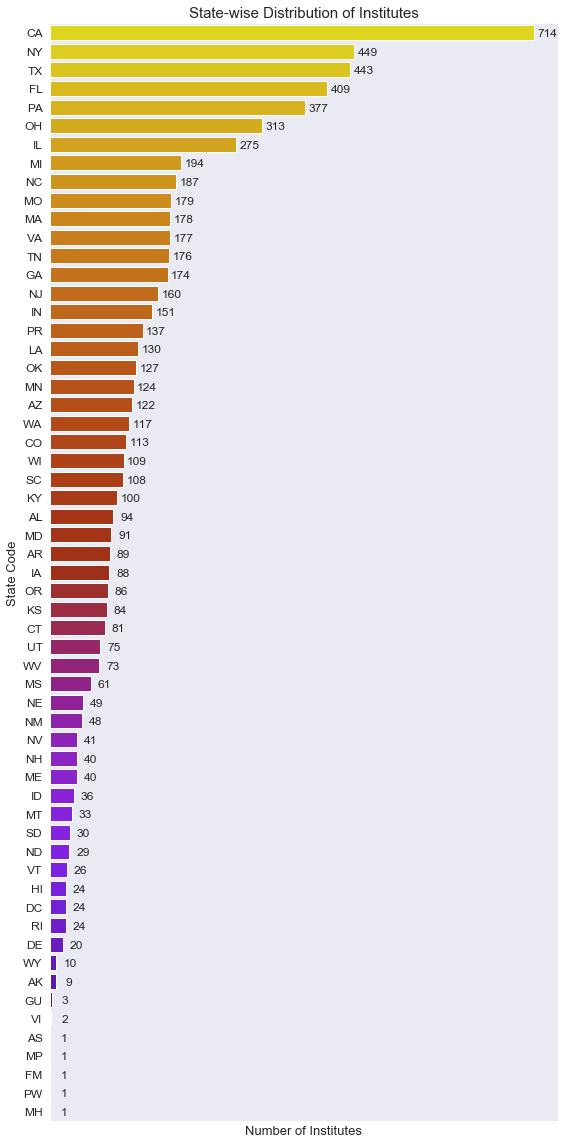

In [69]:
sb.set_style('dark')
plt.figure(figsize = (8, 16))

# plot
ax = sb.barplot(df.stabbr.value_counts().values, list(df.stabbr.value_counts().index), 
           palette = sb.color_palette('gnuplot_r', len(df.stabbr.value_counts())))

# annotate the bars
for p in ax.patches:
    width = p.get_width()
    plt.text(20+p.get_width(), p.get_y()+0.55*p.get_height(),
             '{:1.0f}'.format(width),
             ha='center', va='center', fontsize = 12)

# label the plot
plt.title('State-wise Distribution of Institutes', fontsize = 15)
plt.xlabel('Number of Institutes', fontsize = 13)
plt.ylabel('State Code', fontsize = 13)
plt.xticks([], [])
plt.yticks(fontsize = 12)

plt.tight_layout();

> - The state of California (CA) has by far the greatest number of institutes. <br><br>
> - The states of New York (NY), Texas (TX), Florida (FL), Pennsylvania (PA), Ohio (OH) and Illinois (IL) have closely competing numbers. <br><br>
> - The number of institutes in the rest of the states show a gradual decrease as seen in the figure. <br><br>
> - Of the Commonwealth/Territories only the District of Columbia (DC), and Puerto Rico (PR) have a significant number of universities. The rest have a single university each.

#### Q. How is the distribution of the Number of Branches `numbranch`? What is the median number of branches per Institute?

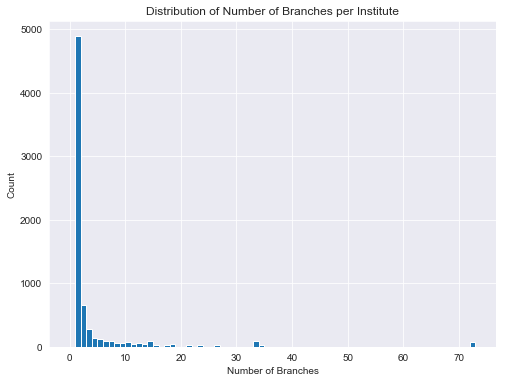

In [70]:
sb.set_style('darkgrid')

# specify the bins
bins = np.arange(0, df.numbranch.max() + 1, 1)

# plot
plt.figure(figsize = (8,6))
plt.hist(data = df, x = 'numbranch', bins = bins)

# label
plt.title('Distribution of Number of Branches per Institute')
plt.xlabel('Number of Branches')
plt.ylabel('Count');

In [71]:
print(f"Percentage of all Universities having a single branch: {len(df.query('numbranch == 1'))/len(df) * 100}")
print(f"The median number of branches per institute: {df.numbranch.median()}")

Percentage of all Universities having a single branch: 69.32558798526495
The median number of branches per institute: 1.0


Let's look at the outlier past the 70 mark:

In [72]:
df.query('numbranch > 70')

,unitid,instnm,city,stabbr,numbranch,highdeg,preddeg,control,distanceonly,tuitfte,...,satvr25,satvr75,satmt25,satmt75,actcm25,actcm75,ugds,ug25abv,pctfloan,cdr3
648,131803,Strayer University-District of Columbia,Washington,DC,73,Graduate's,Bachelor's,Private For-Profit,No,14079.0,...,NaN,NaN,NaN,NaN,NaN,NaN,687.0,0.8726,0.7210,0.106
3682,233684,Strayer University-Virginia,Arlington,VA,73,Graduate's,Bachelor's,Private For-Profit,No,13950.0,...,NaN,NaN,NaN,NaN,NaN,NaN,4256.0,0.8862,0.5652,0.106
4646,430184,Strayer University-Maryland,Suitland,MD,73,Graduate's,Bachelor's,Private For-Profit,No,13615.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2286.0,0.8875,0.6647,0.106
4988,443766,Strayer University-Tennessee,Memphis,TN,73,Graduate's,Bachelor's,Private For-Profit,No,12700.0,...,NaN,NaN,NaN,NaN,NaN,NaN,2049.0,0.8367,0.8790,0.106
4989,443784,Strayer University-Pennsylvania,Trevose,PA,73,Graduate's,Bachelor's,Private For-Profit,No,13533.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1788.0,0.8362,0.7827,0.106
5217,449038,Strayer University-Florida,Tampa,FL,73,Graduate's,Bachelor's,Private For-Profit,No,14280.0,...,NaN,NaN,NaN,NaN,NaN,NaN,1603.0,0.9085,0.7118,0.106
5285,450298,Strayer University-Delaware,Newark,DE,73,Graduate's,Bachelor's,Private For-Profit,No,13853.0,...,NaN,NaN,NaN,NaN,NaN,NaN,267.0,0.8839,0.6951,0.106
5287,450377,Strayer University-Alabama,Birmingham,AL,73,Graduate's,Bachelor's,Private For-Profit,No,13095.0,...,NaN,NaN,NaN,NaN,NaN,NaN,666.0,0.8709,0.8263,0.106
5384,453163,Strayer University-North Carolina,Morrisville,NC,73,Graduate's,Bachelor's,Private For-Profit,No,12964.0,...,NaN,NaN,NaN,NaN,NaN,NaN,3980.0,0.8435,0.8381,0.106
5385,453215,Strayer University-New Jersey,Cherry Hill,NJ,73,Graduate's,Bachelor's,Private For-Profit,No,13316.0,...,NaN,NaN,NaN,NaN,NaN,NaN,770.0,0.8679,0.7150,0.106


We can see these branches are part of 'Strayer University'. Let's look at how these branches are distributed across different states:

In [123]:
# Since this is a categorical variable, plotting a bar chart directly will include all the states, even if they have 
# no branches. For this reason, we need to explicitly specify which states to plot for along with the number of branches.

# Include only the states that have at least one Strayer University branch
list_of_states = [df.query('numbranch > 70').groupby('stabbr').count().numbranch.sort_values(ascending = False).index[i] for
 i in range(0, df.stabbr.nunique()) if
 df.query('numbranch > 70').groupby('stabbr').count().numbranch.sort_values(ascending = False).values[i] > 0]

# Include the number of branches only if that number is more than zero
list_of_counts =  [df.query('numbranch > 70').groupby('stabbr').count().numbranch.sort_values(ascending = False).values[i] for 
  i in range(0, df.stabbr.nunique()) if
  df.query('numbranch > 70').groupby('stabbr').count().numbranch.sort_values(ascending = False).values[i] > 0]

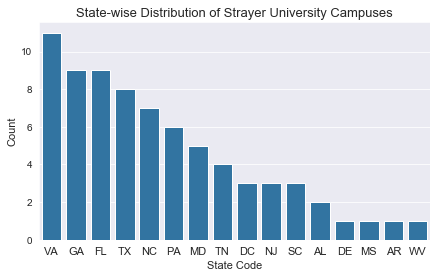

In [124]:
# plot
plt.figure(figsize = (7, 4))
sb.barplot(x = list_of_states, 
           y = list_of_counts, 
          color = sb.color_palette()[0])

# label
plt.title('State-wise Distribution of Strayer University Campuses', fontsize = 13)
plt.xlabel('State Code', fontsize = 11)
plt.ylabel('Count', fontsize = 11)
plt.xticks(fontsize = 11);

> - The median number of branches per Institute in the US is 1.
> - Strayer University has the highest number of branches.
> - The branches of Strayer University are spread across 16 states with the greatest number being in the state of Virginia.

#### Q. Are Graduate Degrees often the highest award conferred at institutes? Which is the most common predominant award at Universities? How is the distribution of Bachelor Degrees in that, are they commonly predmoinant or highest?

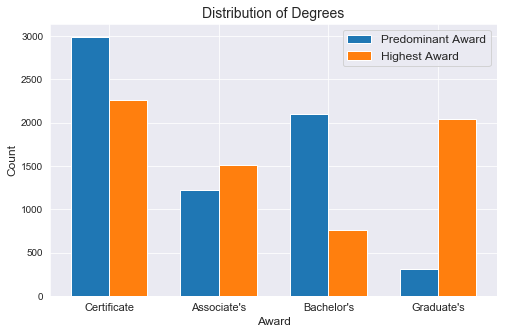

In [154]:
N = 4
preddeg_counts = df.preddeg.value_counts(sort = False).values
highdeg_counts = df.highdeg.value_counts(sort = False).values

ind = np.arange(N)
width = 0.35

c1, c2 = sb.color_palette()[0], sb.color_palette()[1]
fig, ax = plt.subplots(figsize = (8,5))

rects1 = ax.bar(ind, preddeg_counts, width, color = c1)

rects2 = ax.bar(ind + width, highdeg_counts, width, color = c2)

ax.set_xticks(ind + width / 2)
ax.set_xticklabels(("Certificate", "Associate's", "Bachelor's", "Graduate's"), fontsize = 11)
ax.legend( (rects1[0], rects2[0]), ('Predominant Award', 'Highest Award'), fontsize = 12 )

plt.title('Distribution of Degrees', fontsize = 14)
plt.xlabel('Award', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

In [362]:
df.groupby(['preddeg', 'highdeg']).size().reset_index(name = 'count')

,preddeg,highdeg,count
0,Certificate,Certificate,2259
1,Certificate,Associate's,630
2,Certificate,Bachelor's,56
3,Certificate,Graduate's,36
4,Associate's,Associate's,883
5,Associate's,Bachelor's,274
6,Associate's,Graduate's,53
7,Bachelor's,Bachelor's,432
8,Bachelor's,Graduate's,1654
9,Graduate's,Graduate's,304


We will study the relationship between `preddeg` and `highdeg` in more detail when we produce bivariate visualizations ahead.

For now, we can draw the following conclusions:

> - Graduate's Degree is rarely the predominant award conferred. The institutes that have Graduate Degrees as predominant though also have their highest award as the same. These institutes exclusively offer Graduate Degrees only.
> - A large number of institutes offer a Certificate. It is clear that most of the institutes that have their predominant award as a Certificate, also have their Highest award as the same.
> - Few universities have Bachelor's Degree as their highest award. However, Bachelor's being the predominant award is fairly common.

#### Q. How is the number of Public, Private Nonprofit and Private For-Profit Institutions distributed?

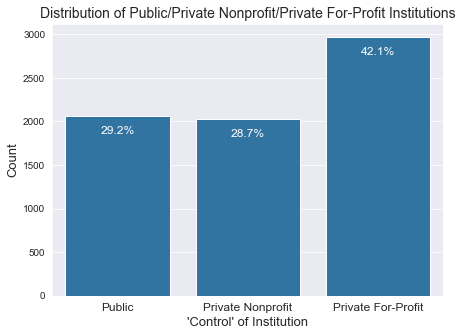

In [189]:
plt.figure(figsize = (7, 5))
# plot
sb.countplot(data = df, x = 'control', color = sb.color_palette()[0])

# annotate
n_points = df.shape[0]
cat_counts = df.control.value_counts()
locs, labels = plt.xticks()                # get current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    
    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100 * count / n_points)
    
    # print the annotations below the top of the bar
    plt.text(loc, count-200, pct_string, ha = 'center', color = 'w', fontsize = 12)
    
# label
plt.title('Distribution of Public/Private Nonprofit/Private For-Profit Institutions', fontsize = 14)
plt.xticks(fontsize = 12)
plt.xlabel("'Control' of Institution", fontsize = 13)
plt.ylabel('Count', fontsize = 13);

> - There are about 30% more Private For-Profit Institutes than there are Public or Private Nonprofits.

#### Q. How is the distribution of the net tuition revenue per student?

In [196]:
df.tuitfte.describe()

count      6593.000000
mean      10703.999545
std       12450.438281
min           0.000000
25%        4938.000000
50%        9148.000000
75%       13848.000000
max      712078.000000
Name: tuitfte, dtype: float64

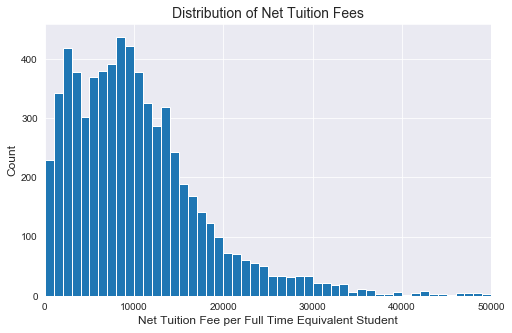

In [226]:
plt.figure(figsize = (8,5))

# specify the bins
bins = np.arange(0, df.tuitfte.max() + 1000, 1000)

# plot
plt.hist(data = df, x = 'tuitfte', bins = bins);
plt.xlim(0,50000)

# label
plt.title('Distribution of Net Tuition Fees', fontsize = 14)
plt.xlabel('Net Tuition Fee per Full Time Equivalent Student', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

> - The distribution looks roughly bimodal with modes around 3,000 and 9,000 mark.
> - About 75% of the institutes earn less than 14,000 per FTE Student. The counts taper off quickly after that mark.

Lets look at the more expensive institutes:

In [224]:
df.query('tuitfte > 50000')[['instnm', 'city', 'control', 'tuitfte']].sort_values(by = 'tuitfte')

,instnm,city,control,tuitfte
5461,Pacific Northwest University of Health Sciences,Yakima,Private Nonprofit,50572.0
5669,Southern California University SOMA,Los Angeles,Private For-Profit,50648.0
2969,Pennsylvania State University-Dickinson Law,Carlisle,Public,52244.0
2268,The International Culinary Center,New York,Private For-Profit,52585.0
6542,Los Angeles Academy of Figurative Art,Van Nuys,Private For-Profit,54382.0
5591,Institute of Culinary Education,New York,Private For-Profit,55500.0
5616,Pinchot University,Seattle,Private Nonprofit,57961.0
5402,Ottawa University-Online,Ottawa,Private Nonprofit,58553.0
5177,Institute of Professional Careers,Las Vegas,Private For-Profit,59776.0
5161,Aviator College of Aeronautical Science and Te...,Fort Pierce,Private For-Profit,60619.0


> - Most of these institutes are Private. Further these are mainly For-Profit.
> - The bottom three institutes earn over 100,000 per FTE. These datapoints are errors in all likelyhood. However we cannot ascertain this and for now we will keep them in the dataset. 

#### Q. What is the median monthly Faculty Salary?

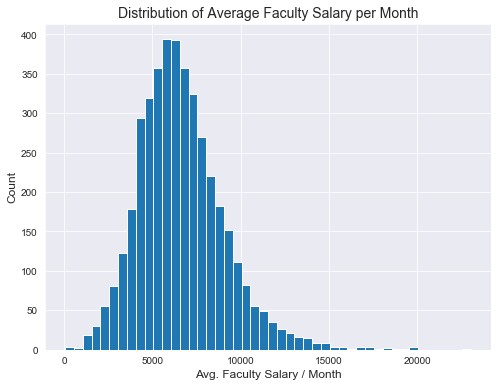

In [247]:
plt.figure(figsize = (8, 6))
bins = np.arange(50, df.avgfacsal.max() + 500, 500)
plt.hist(data = df, x = 'avgfacsal', bins = bins)

plt.title('Distribution of Average Faculty Salary per Month', fontsize = 14)
plt.xlabel('Avg. Faculty Salary / Month', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

In [250]:
print(f'The median Avg. Faculty Salary per month is: {df.avgfacsal.median()}')

The median Avg. Faculty Salary per month is: 6377.0


> - Distribution is unimodal with a slight skew on the right. 
> - The median faculty salary is 6,377 per month.

#### Q. How is the distribution of admission rates for all institutes?

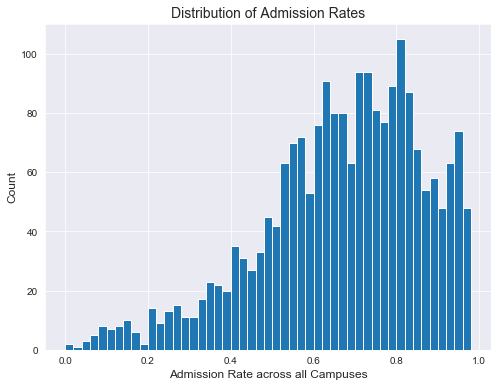

In [255]:
plt.figure(figsize = (8,6))
bins = np.arange(0, 1, 0.02)
plt.hist(data = df, x = 'adm_rate_all', bins = bins)

plt.title('Distribution of Admission Rates', fontsize = 14)
plt.xlabel('Admission Rate across all Campuses', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

> - The distribution seems to be clustered around certain discrete admission rates. 
> - Also, it is left skewed which means on average, universities have admission rates on the higher side.

#### Q. What makes for a _good_ or _bad_ SAT or ACT score?

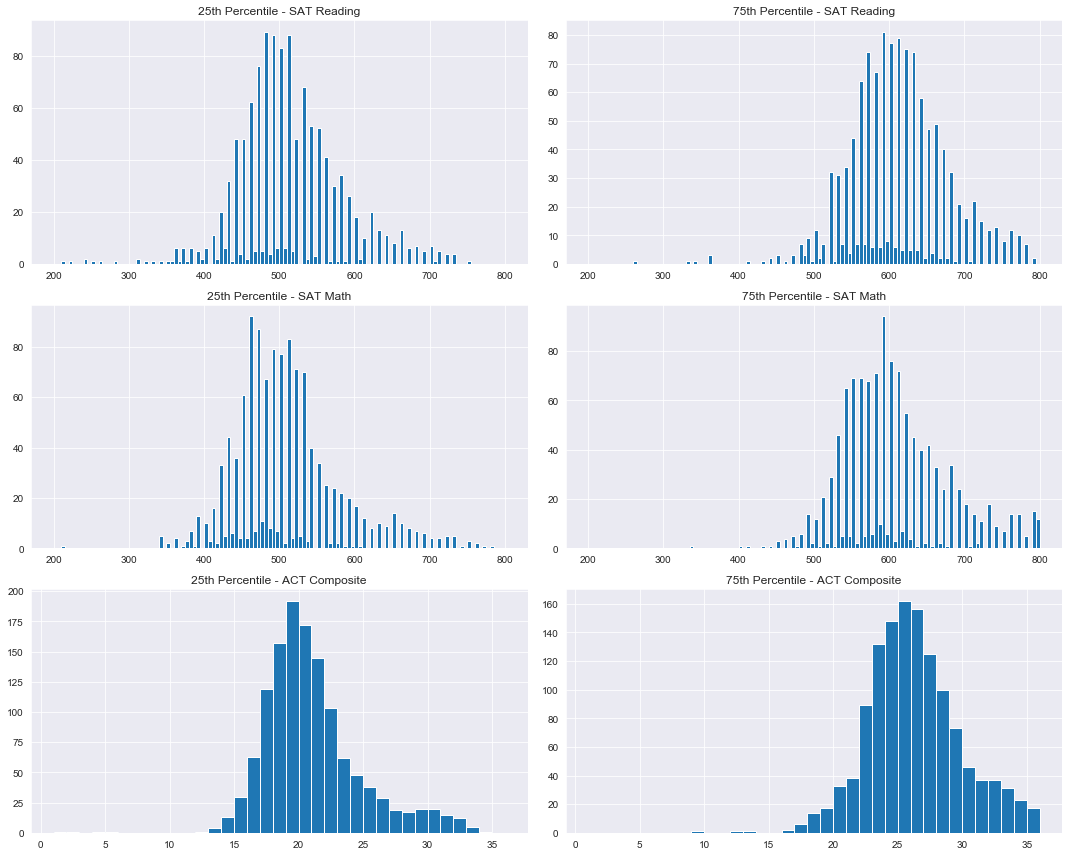

In [268]:
# function to plot histograms
def hist(series, title, act = False):
    if act == True:
        bins = np.arange(1, 36 + 1, 1)  # the scale for ACTs is 1 - 36
        plt.hist(x = series, bins = bins)
        plt.title(title);
    else:
        bins = np.arange(200, 800 + 5, 5)  # the scale for SATs is 200 - 800
        plt.hist(x = series, bins = bins)
        plt.title(title);
    

# plot
plt.figure(figsize = (15, 12))

plt.subplot(3, 2, 1)
hist(df.satvr25, '25th Percentile - SAT Reading')

plt.subplot(3, 2, 2)
hist(df.satvr75, '75th Percentile - SAT Reading')

plt.subplot(3, 2, 3)
hist(df.satmt25, '25th Percentile - SAT Math')

plt.subplot(3, 2, 4)
hist(df.satmt75, '75th Percentile - SAT Math')

plt.subplot(3, 2, 5)
hist(df.actcm25, '25th Percentile - ACT Composite', act = True)

plt.subplot(3, 2, 6)
hist(df.actcm75, '75th Percentile - ACT Composite', act = True)

plt.tight_layout()

> - We can see that the SAT scores are clustered in discrete bins. This is most likely due to the peculiarities of the Grading System such as fixed increments.
> - Most universities have their 75th Percentile for both Reading and Math fall around 600.
> - Similarly most universities have their 25th Percentile fall around 500. 
> - From these observations it can be said that _a good **SAT** score that makes a candidate eligible to get an admission at a number of schools is in the range **500 - 600**._
> - The distributions of ACT Composite Scores is generally normal with skews to the right and left for 25th and 75th percentiles respectively. 
> - From the observations it can be said that _a good **ACT Composite** score is anywhere between **20 and 26**._

This element, as reported in the IPEDS Student Financial Aid (SFA) component, shows the share of undergraduate students who received federal loans in a given year.

In [278]:
df.pctfloan.describe()

count    6291.000000
mean        0.483948
std         0.281007
min         0.000000
25%         0.264050
50%         0.543300
75%         0.704000
max         1.000000
Name: pctfloan, dtype: float64

#### Q. How is the distribution of percentage of students who receive federal loans per institute?

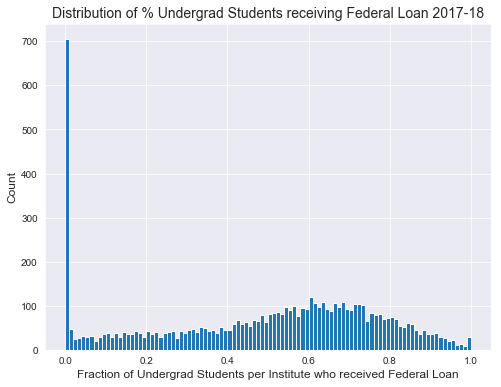

In [288]:
plt.figure(figsize = (8, 6))
bins = np.arange(0, 1 + 0.01, 0.01)
plt.hist(data = df, x = 'pctfloan', bins = bins)

plt.title('Distribution of % Undergrad Students receiving Federal Loan 2017-18', fontsize = 14)
plt.xlabel('Fraction of Undergrad Students per Institute who received Federal Loan', fontsize = 12)
plt.ylabel('Count', fontsize = 12);

> - There is a large number of institutions (over 700) where almost none of the students received a federal loan. 
> - There is a decent number of institutions where 50 - 70 percent of the students receive a federal loan.

Cohort default rates are produced annually as an institutional accountability metric; institutions with high default rates may lose access to federal financial aid. The three-year cohort default rate (CDR3) represents a snapshot in time

#### Q. As of the academic year 2017-18, which institutes stand to lose federal financial aid?

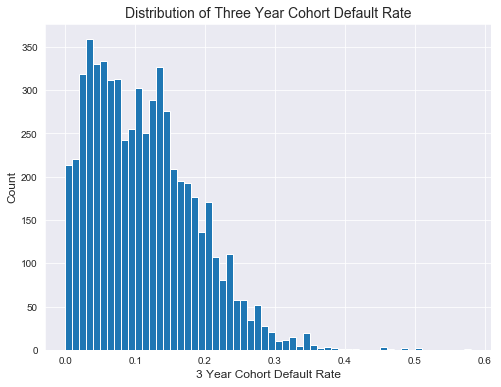

In [296]:
plt.figure(figsize = (8, 6))
bins = np.arange(0, df.cdr3.max() + 0.01, 0.01)
plt.hist(data = df, x = 'cdr3', bins = bins)

plt.title('Distribution of Three Year Cohort Default Rate', fontsize = 14)
plt.xlabel('3 Year Cohort Default Rate', fontsize = 12)
plt.ylabel('Count', fontsize= 12);

In [299]:
df.query('cdr3 > 0.4')['instnm']

2212                      Cheryl Fells School of Business
2605                      United Tribes Technical College
3905                     Universidad Teologica del Caribe
4954                 Family of Faith Christian University
5959                               Larry's Barber College
5966    Tomorrow's Image Barber And Beauty Academy of ...
6021                         Advance Beauty Techs Academy
6096                         Sharp Edgez Barber Institute
6217                                Champ's Barber School
6596           Bull City Durham Beauty and Barber College
7047               Sharp Edgez Barber Institute - Buffalo
Name: instnm, dtype: object

> - Although we cannot determine what constitutes as a 'high' Cohort Default Rate without domain knowledge, we can see from the distribution that CDR3 above 0.4 only occurs in isolated instances. We can determine the names of these institutes and tentatively answer our question as to which institutes stand to lose federal financial aid.

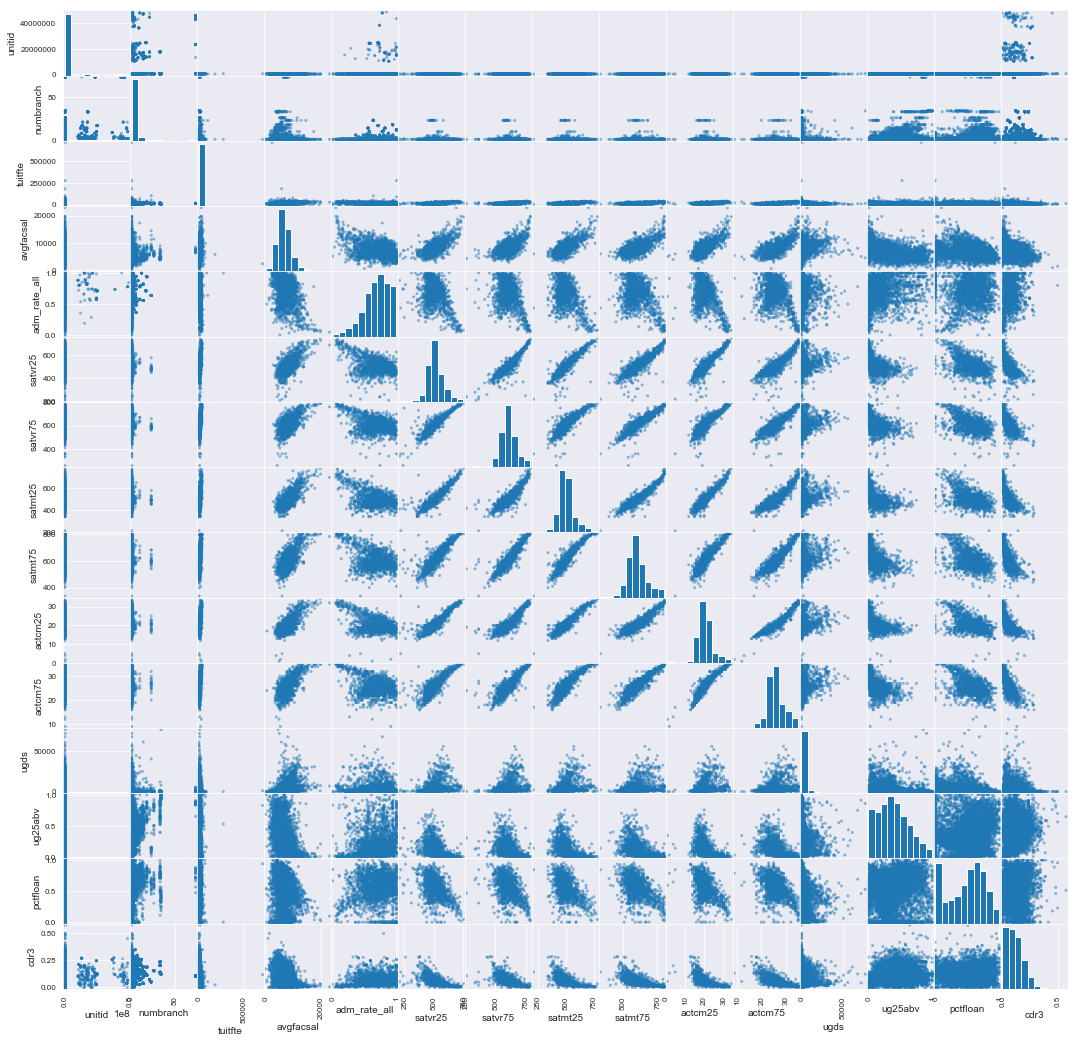

In [302]:

pd.plotting.scatter_matrix(df, figsize = (18, 18));

### Bivariate Explorations

Here we will look for relationships between two variables.

#### Q. How does admission rate of an institute affect the average faculty salary?

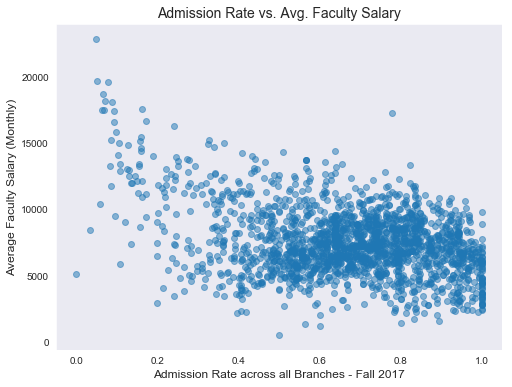

In [311]:
sb.set_style('dark')
plt.figure(figsize = (8, 6))

sb.regplot(data = df, x = 'adm_rate_all', y = 'avgfacsal', fit_reg = False, scatter_kws = {'alpha':1/2})

plt.title('Admission Rate vs. Avg. Faculty Salary', fontsize = 14)
plt.xlabel('Admission Rate across all Branches - Fall 2017', fontsize = 12)
plt.ylabel('Average Faculty Salary (Monthly)', fontsize = 12);

Lets get the Pearson's Correlation Coefficient for the plot:

In [331]:
df[['avgfacsal', 'adm_rate_all']].corr()

,avgfacsal,adm_rate_all
avgfacsal,1.00000,-0.35235
adm_rate_all,-0.35235,1.00000


Lets look at the institutes lying approximately in the upper left corner of the scatter plot:

In [332]:
df.query('avgfacsal > 15000 and adm_rate_all < 0.1')[['instnm', 'adm_rate_all', 'avgfacsal']].sort_values(by = 'avgfacsal')

,instnm,adm_rate_all,avgfacsal
3175,Brown University,0.084925,15276.0
2486,Duke University,0.098588,15844.0
1022,Northwestern University,0.092380,16645.0
3093,University of Pennsylvania,0.092965,17435.0
630,Yale University,0.069254,17517.0
2112,Princeton University,0.064078,17519.0
925,University of Chicago,0.087347,18115.0
1567,Massachusetts Institute of Technology,0.071714,18182.0
2222,Columbia University in the City of New York,0.066084,18713.0
211,California Institute of Technology,0.077395,19600.0


> - It can be observed that admission rate has a weak negative correlation (r = -0.35) with average faculty salary.
> - As one might expect, institutes that have a very low admission rate and a very high average faculty salary are among the most notable institutes in the US.

#### Q. One might expect that institutes having a high 75th percentile of test scores of admitted students would have low admission rates. Lets see what the data has to say.

Here we will plot admission rate vs. 75th percentile scores of admitted students for both SATs and ACTs.

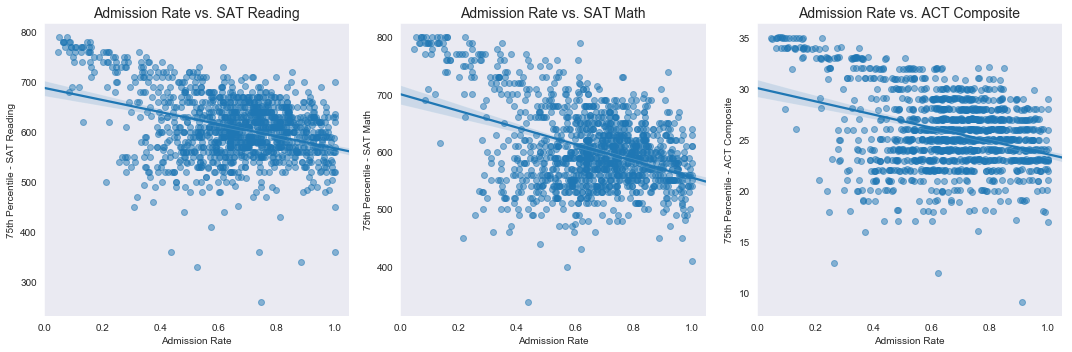

In [347]:
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
sb.regplot(data = df, x = 'adm_rate_all', y = 'satvr75', scatter_kws = {'alpha' : 1/2})
plt.title('Admission Rate vs. SAT Reading', fontsize = 14)
plt.xlabel('Admission Rate')
plt.ylabel('75th Percentile - SAT Reading')

plt.subplot(1, 3, 2)
sb.regplot(data = df, x = 'adm_rate_all', y = 'satmt75', scatter_kws = {'alpha' : 1/2})
plt.title('Admission Rate vs. SAT Math', fontsize = 14)
plt.xlabel('Admission Rate')
plt.ylabel('75th Percentile - SAT Math')

plt.subplot(1, 3, 3)
sb.regplot(data = df, x = 'adm_rate_all', y = 'actcm75', y_jitter = 0.1, scatter_kws = {'alpha' : 1/2})
plt.title('Admission Rate vs. ACT Composite', fontsize = 14)
plt.xlabel('Admission Rate')
plt.ylabel('75th Percentile - ACT Composite')

plt.tight_layout();

> - We can see here that institutes that have low admission rates tend to have higher scores as the 75th percentile of admitted students, regardless of which test we are looking at.

#### Q. Are the highest awards also the predominant awards conferred at various institutes? Which are the most common highest or predominant awards?

In [374]:
ct_counts = df.groupby(['preddeg', 'highdeg']).size()
ct_counts = ct_counts.reset_index(name = 'count')
ct_counts = ct_counts.pivot(index = 'highdeg', columns = 'preddeg', values = 'count')
ct_counts

preddeg,Certificate,Associate's,Bachelor's,Graduate's
highdeg,,,,
Certificate,2259.0,NaN,NaN,NaN
Associate's,630.0,883.0,NaN,NaN
Bachelor's,56.0,274.0,432.0,NaN
Graduate's,36.0,53.0,1654.0,304.0


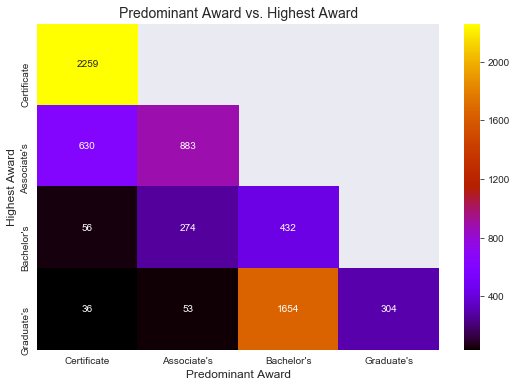

In [382]:
plt.figure(figsize = (9,6))
sb.heatmap(ct_counts, annot = True, fmt = '.0f',cmap = 'gnuplot')

plt.title('Predominant Award vs. Highest Award', fontsize = 14)
plt.xlabel('Predominant Award', fontsize = 12)
plt.ylabel('Highest Award', fontsize = 12);

> - Institutes that offer a Certificate as their highest award also tend to have their predominant award as the same.
> - Institutes that offer a Graduate's Degree as their predominant award tend to have their highest award as the same.
> - A Certificate is the most common award offered followed by a Bachelor's.
> - Institutes that offer a Graduate's Degree as their highes award rarely have their predominant award as a Certificate of Associate's Degree. They tend to have their predominant award as a Bachelor's.